In [3]:
import pandas as pd
#load the CSV file
df = pd.read_csv('bank-full.csv')

In [ ]:
df.info()

In [5]:
df.groupby('y').size() # to see distribution of data

y
no     39922
yes     5289
dtype: int64

In [6]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')  # to convert output data to integer(binary) from string

In [7]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,balance,housing,loan,contact,day
0,58,management,married,tertiary,no,2143,yes,no,unknown,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  y             45211 non-null  object
 17  OUTPUT_LABEL  45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [17]:
# For string type values seeing the possible values stored
for a in list(df.columns):
    
    # here n is a list of unique values
    n = df[a].unique() 
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 77 unique values
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance: 7168 unique values
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day: 31 unique values
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration: 1573 unique values
campaign: 48 unique values
pdays: 559 unique values
previous: 41 unique values
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']
OUTPUT_LABEL
[0 1]


In [9]:
cols_num = ['campaign', 'pdays',
       'previous', 'day','age','balance','duration']  # numerical type values columns

Text(0.5, 1.0, 'Age Count Distribution')

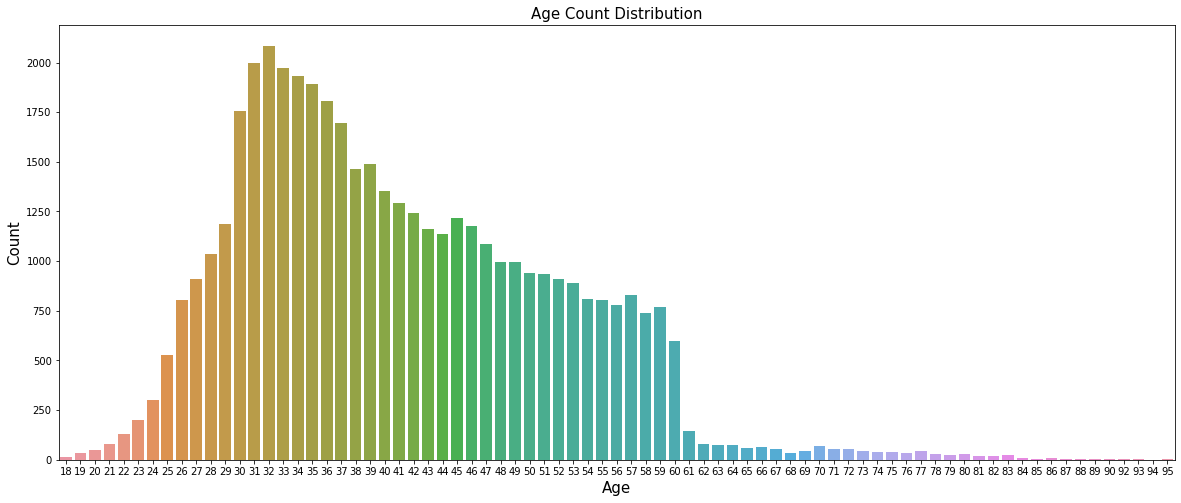

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # using the seaborn style
%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)  # setting the size of the figure
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)

In [12]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month'
       , 'poutcome']

In [14]:
df = pd.concat([df,cols_new_cat], axis = 1)  # to add the one-hot encoding columns to the dataframe, we use the concat function. axis = 1 is used to add the columns.

In [15]:
cols_all_cat=list(cols_new_cat.columns)

In [21]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)  # to check for null values if any

poutcome_unknown       0
job_retired            0
education_primary      0
marital_single         0
marital_married        0
marital_divorced       0
job_unknown            0
job_unemployed         0
job_technician         0
job_student            0
job_services           0
job_self-employed      0
job_management         0
education_tertiary     0
job_housemaid          0
job_entrepreneur       0
job_blue-collar        0
job_admin.             0
duration               0
balance                0
age                    0
day                    0
previous               0
pdays                  0
education_secondary    0
education_unknown      0
poutcome_success       0
month_feb              0
poutcome_other         0
poutcome_failure       0
month_sep              0
month_oct              0
month_nov              0
month_may              0
month_mar              0
month_jun              0
month_jul              0
month_jan              0
month_dec              0
default_no             0


In [17]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [ ]:
cols_input

In [ ]:
df_data.head(50)

In [31]:
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)  # to randomly shuffle the data

In [32]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [33]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)  # 50% of the 30% i.e. 15% to the test set
df_valid = df_valid_test.drop(df_test.index)  # remaining 15% to validation set

In [ ]:
df_train_all=df_data.drop(df_valid_test.index)

In [34]:
#The following steps are to ensure there isn't any biased data division leading to sampling related inaccuracies
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

In [35]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 42).reset_index(drop = True)

In [36]:
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 42).reset_index(drop = True)

In [37]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [38]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [40]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [25]:
df_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_test)/len(df_data)))

Split size: 0.300


In [42]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.772213
2,pdays,40.349438
3,previous,0.586009
4,day,15.830037


In [43]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [44]:
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

In [45]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

In [47]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [48]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [49]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1810)

In [53]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_valid)

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_valid,y_pred)
print(cm)

[[660  90]
 [ 44 706]]


In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_valid,y_pred)))

Accuracy: 0.9106666666666666
